# import thư viện 

In [3]:

import pandas as pd  # Đọc và xử lý dữ liệu.
import numpy as np  # Thao tác dữ liệu số và mảng.
from sklearn.preprocessing import LabelEncoder  # Mã hóa nhãn từ văn bản sang số.
from sklearn.model_selection import train_test_split  # Chia dữ liệu thành tập huấn luyện và kiểm tra.
from tensorflow.keras.models import Sequential  # Mô hình tuần tự.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # Các lớp mô hình.
from tensorflow.keras.regularizers import l2  # Điều chuẩn trọng số để giảm overfitting.
from tensorflow.keras.optimizers import Adam  # Tối ưu hóa mô hình.
from tensorflow.keras.callbacks import EarlyStopping  # Dừng sớm để tránh overfitting.
from tensorflow.keras.utils import to_categorical  # Chuyển nhãn sang one-hot encoding.
import matplotlib.pyplot as plt  # Vẽ đồ thị để trực quan hóa.
from ipywidgets import widgets  # Tạo giao diện tương tác trong notebook.
from IPython.display import display  # Hiển thị widgets.


# Bước 1: Đọc file

In [4]:

data = pd.read_csv('../Data/raw/combination_data.csv')
print("Số lượng hàng và cột:")
print(data.shape)
data.head()


Số lượng hàng và cột:
(819, 79)


,Kỹ năng,Trình bày luận điểm một cách có hệ thống rõ ràng,Sử dụng dẫn chứng thống kê đáng tin cậy,Chủ động đưa ra các ví dụ trường hợp cụ thể để minh họa cho luận điểm,Có khả năng tóm tắt vấn đề một cách rõ ràng ngắn gọn,Sử dụng ngôn ngữ rõ ràng logic và lập luận chặt chẽ,Có khả năng điều chỉnh quan điểm dựa trên lập luận và bằng chứng mới,Trình bày các bằng chứng dẫn chứng thuyết phục,Sử dụng ngữ điệu nhấn nhá hợp lý khi nói để thu hút người nghe,Biết lắng nghe và tôn trọng quan điểm của đối phương,...,Phân biệt được giữa bằng chứng mạnh và yếu,Nhận diện được các lỗi logic và thiếu sót trong lập luận,Sử dụng tiêu chí rõ ràng và công bằng để đánh giá luận điểm,Đưa ra phản hồi và gợi ý cải thiện dựa trên đánh giá,Kết hợp thông tin từ nhiều nguồn để tạo ra một cái nhìn tổng thể,Xem xét mối quan hệ giữa các ý tưởng và thông tin để xây dựng luận điểm mới,Tạo liên kết giữa các quan điểm và lập luận có vẻ mâu thuẫn nhau,Sử dụng tư duy sáng tạo để phát triển giải pháp hoặc ý tưởng mới,Tổng hợp kết luận dựa trên đánh giá và phân tích,Trình bày thông tin một cách rõ ràng và mạch lạc thể hiện sự hiểu biết tổng thể
0,Kỹ năng tranh luận Lập luận Logic,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kỹ năng tranh luận Thuyết Phục,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Kỹ năng tranh luận Phản Biện,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kỹ năng kiểm soát cảm xúc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kỹ năng Quản Lý Thời Gian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Bước 2: Tiền xử lý dữ liệu

In [6]:

label_encoder = LabelEncoder()


# Cột "Kỹ năng" là nhãn (target) cần dự đoán
X = data.drop('Kỹ năng', axis=1)  # Dữ liệu đầu vào (features)
y = label_encoder.fit_transform(data['Kỹ năng'])  # Dữ liệu đầu ra (target), đã được số hóa

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỉ lệ là 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Xác định số lượng nhãn duy nhất
num_unique_labels = np.unique(y).shape[0]

# Chuyển đổi nhãn sang one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=num_unique_labels)
y_test_one_hot = to_categorical(y_test, num_classes=num_unique_labels)




# Bước 3: Xây dựng và huấn luyện mô hình

In [7]:
# Xây dựng mô hình với cấu hình giảm kích thước, tăng L2 regularization và Dropout
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.02)),  
    BatchNormalization(),
    Dropout(0.6),  
    Dense(16, activation='relu', kernel_regularizer=l2(0.02)),  
    BatchNormalization(),
    Dropout(0.6),  
    Dense(num_unique_labels, activation='softmax')
])
# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.0005),  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Định nghĩa callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Huấn luyện mô hình với Early Stopping
history = model.fit(X_train, y_train_one_hot, epochs=52, batch_size=128, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test loss: {loss}\nTest accuracy: {accuracy}')

Epoch 1/52


C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0809 - loss: 4.5640 - val_accuracy: 0.0076 - val_loss: 3.8471
Epoch 2/52
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0977 - loss: 4.3743 - val_accuracy: 0.1450 - val_loss: 3.8093
Epoch 3/52
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1225 - loss: 4.3712 - val_accuracy: 0.2443 - val_loss: 3.7719
Epoch 4/52
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1467 - loss: 4.2040 - val_accuracy: 0.2595 - val_loss: 3.7362
Epoch 5/52
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1635 - loss: 4.0046 - val_accuracy: 0.2672 - val_loss: 3.7018
Epoch 6/52
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1381 - loss: 4.1830 - val_accuracy: 0.2824 - val_loss: 3.6689
Epoch 7/52
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1800 - loss: 3.9702 - val_accuracy: 0.2901 - val_loss: 3.6378
Epoch 8/52
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1748 - loss: 3.8929 - val_accuracy: 0.2901 - val_loss: 3.6089
Epoch 9/52
5/5 ━

# Vẽ đồ thị loss và accuracy

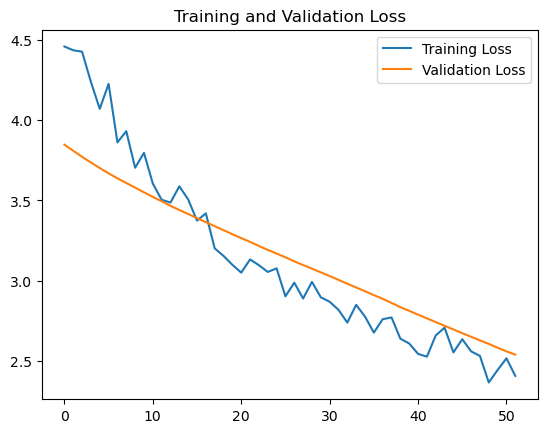

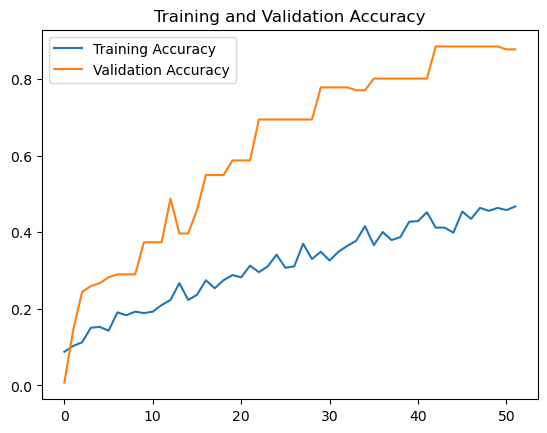

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Bước 4: Dự đoán

In [9]:
from ipywidgets import widgets
from IPython.display import display
import numpy as np

# Tạo checkbox cho mỗi biểu hiện từ tập dữ liệu
checkboxes = [widgets.Checkbox(description=column) for column in X.columns]

# Hiển thị các checkbox
for checkbox in checkboxes:
    display(checkbox)

# Tạo button để thực hiện dự đoán
button = widgets.Button(description="Dự đoán kỹ năng")
display(button)

def predict_skills(button):
    selected_features = [checkbox.description for checkbox in checkboxes if checkbox.value]
    
    if not selected_features:
        print("Vui lòng chọn ít nhất một biểu hiện.")
        return
    
    # Chuẩn bị dữ liệu dự đoán
    input_data = X.loc[:, selected_features].astype(float)
    missing_columns = set(X_train.columns) - set(input_data.columns)
    for column in missing_columns:
        input_data[column] = 0
    input_data = input_data[X_train.columns]  # Đảm bảo cùng thứ tự cột
    
    # Dự đoán và tìm kỹ năng có tỷ lệ % cao nhất
    predictions = model.predict(input_data)
    predicted_classes = np.argmax(predictions, axis=1)
    probabilities = np.max(predictions, axis=1) * 100  # Tính tỷ lệ %
    
    # Hiển thị kết quả dự đoán với tỷ lệ % cao nhất
    highest_probability_index = np.argmax(probabilities)
    highest_probability = probabilities[highest_probability_index]
    highest_skill = label_encoder.classes_[predicted_classes[highest_probability_index]]
    
    print(f"Kỹ năng dự đoán cao nhất: {highest_skill} với {highest_probability:.2f}% tỷ lệ chắc chắn.")
    
# Gán sự kiện click cho button
button.on_click(predict_skills)


Checkbox(value=False, description='Trình bày luận điểm một cách có hệ thống rõ ràng')

Checkbox(value=False, description='Sử dụng dẫn chứng thống kê đáng tin cậy')

Checkbox(value=False, description='Chủ động đưa ra các ví dụ trường hợp cụ thể để minh họa cho luận điểm')

Checkbox(value=False, description='Có khả năng tóm tắt vấn đề một cách rõ ràng ngắn gọn')

Checkbox(value=False, description='Sử dụng ngôn ngữ rõ ràng logic và lập luận chặt chẽ')

Checkbox(value=False, description='Có khả năng điều chỉnh quan điểm dựa trên lập luận và bằng chứng mới')

Checkbox(value=False, description='Trình bày các bằng chứng dẫn chứng thuyết phục')

Checkbox(value=False, description='Sử dụng ngữ điệu nhấn nhá hợp lý khi nói để thu hút người nghe')

Checkbox(value=False, description='Biết lắng nghe và tôn trọng quan điểm của đối phương')

Checkbox(value=False, description='Sẵn sàng thừa nhận sai sót nếu có bằng chứng chứng minh')

Checkbox(value=False, description='Tự tin bình tĩnh và tập trung cao độ trong suốt quá trình tranh luận')

Checkbox(value=False, description='Có khả năng đọc hiểu và sử dụng ngôn ngữ cơ thể một cách chuyên nghiệp')

Checkbox(value=False, description='Phân tích các luận điểm một cách khách quan')

Checkbox(value=False, description='Đặt câu hỏi sâu sắc để làm rõ vấn đề')

Checkbox(value=False, description='Giữ bình tĩnh và không cáu giận hay xúc phạm đối phương')

Checkbox(value=False, description='Suy nghĩ sáng tạo đưa ra các giải pháp thay thế')

Checkbox(value=False, description='Đánh giá cả hai mặt tích cực và tiêu cực của vấn đề')

Checkbox(value=False, description='Có tư duy phản biện tốt')

Checkbox(value=False, description='Suy luận logic khi giải quyết vấn đề')

Checkbox(value=False, description='Phân tích thông tin để đưa ra nhận định và suy luận')

Checkbox(value=False, description='Sử dụng lập luận logic để chứng minh điều gì đó')

Checkbox(value=False, description='Đưa ra giả thuyết và kiểm chứng chúng')

Checkbox(value=False, description='Nhận biết và tránh các sai lầm logic')

Checkbox(value=False, description='Áp dụng quy tắc loại trừ để tìm ra giải pháp')

Checkbox(value=False, description='Đặt câu hỏi để thách thức và kiểm chứng thông tin')

Checkbox(value=False, description='Phân tích các luận điểm và đánh giá bằng chứng')

Checkbox(value=False, description='Xét vấn đề từ nhiều khía cạnh và quan điểm')

Checkbox(value=False, description='Sử dụng lý luận logic để đưa ra kết luận')

Checkbox(value=False, description='Tích cực tìm kiếm các quan điểm đối lập')

Checkbox(value=False, description='Biết cách kiểm tra và xác minh tính đúng đắn của thông tin ')

Checkbox(value=False, description='Kết nối các ý tưởng rời rạc để tạo ra giải pháp mới')

Checkbox(value=False, description='Sẵn lòng thử nghiệm những ý tưởng mới và táo bạo')

Checkbox(value=False, description='Tạo ra ý tưởng độc đáo và không giới hạn')

Checkbox(value=False, description='Chấp nhận rủi ro và học hỏi từ thất bại')

Checkbox(value=False, description='Luôn tò mò với mọi thứ đang tìm hiểu')

Checkbox(value=False, description='Biết cách áp dụng những kiến thức đã học và biến chúng thành giải pháp sáng…

Checkbox(value=False, description='Lập kế hoạch và tổ chức thời gian và tài nguyên')

Checkbox(value=False, description='Sử dụng kỹ năng quản lý để giải quyết vấn đề và đạt được mục tiêu')

Checkbox(value=False, description='Theo dõi và đánh giá tiến độ và hiệu suất')

Checkbox(value=False, description='Khả năng thích nghi với thay đổi và quản lý rủi ro')

Checkbox(value=False, description='Lập kế hoạch dự phòng và ứng phó với tình huống khẩn cấp')

Checkbox(value=False, description='Biết cách xử lý xung đột và giải quyết vấn đề hiệu quả')

Checkbox(value=False, description='Giữ bình tĩnh dù trong tình huống gây cấn')

Checkbox(value=False, description='Phản ứng một cách suy nghĩ thay vì phản xạ tức thời dựa trên cảm xúc')

Checkbox(value=False, description='Nhận biết cảm xúc của bản thân và điều chỉnh phản ứng cho phù hợp')

Checkbox(value=False, description='Không để cảm xúc cá nhân ảnh hưởng đến lập luận')

Checkbox(value=False, description='Sử dụng ngôn ngữ tích cực tránh ngôn ngữ tiêu cực hay công kích')

Checkbox(value=False, description='Duy trì sự tôn trọng đối với người khác dù trong tranh cãi')

Checkbox(value=False, description='Lập kế hoạch và ưu tiên các phần của cuộc tranh luận')

Checkbox(value=False, description='Đảm bảo mỗi phần của luận điểm được trình bày đầy đủ trong thời gian có hạn…

Checkbox(value=False, description='Tránh lan man tập trung vào mục tiêu đã xác định')

Checkbox(value=False, description='Sử dụng thời gian hiệu quả để tạo ra sức mạnh cho luận điểm')

Checkbox(value=False, description='Phân bổ thời gian cho việc nghe và phản hồi')

Checkbox(value=False, description='Không lập kế hoạch hoặc ưu tiên các phần của cuộc tranh luận dẫn đến sự rối…

Checkbox(value=False, description='Xác định thông tin quan trọng và liên quan từ trong một lượng lớn dữ liệu')

Checkbox(value=False, description='Phân biệt giữa ý kiến và thực tế')

Checkbox(value=False, description='Nhận diện mối liên hệ giữa các thông tin và ý tưởng')

Checkbox(value=False, description='Đánh giá sức mạnh và điểm yếu của một luận điểm')

Checkbox(value=False, description='Sử dụng phân tích để phát triển luận điểm mạnh mẽ')

Checkbox(value=False, description='Đưa ra kết luận dựa trên bằng chứng và phân tích')

Checkbox(value=False, description='Áp dụng logic để từng bước tiến tới kết luận')

Checkbox(value=False, description='Sử dụng suy luận để nối kết thông tin và bằng chứng')

Checkbox(value=False, description='Phát triển giả định dựa trên thông tin có sẵn')

Checkbox(value=False, description='Kiểm tra tính hợp lý của kết luận')

Checkbox(value=False, description='Phân biệt giữa suy luận hợp lệ và không hợp lệ')

Checkbox(value=False, description='Sử dụng suy luận để chứng minh hoặc bác bỏ một luận điểm')

Checkbox(value=False, description='Đánh giá một cách khách quan tính chính xác và độ tin cậy của nguồn thông t…

Checkbox(value=False, description='Cân nhắc các quan điểm và luận điểm từ nhiều góc độ khác nhau')

Checkbox(value=False, description='Phân biệt được giữa bằng chứng mạnh và yếu')

Checkbox(value=False, description='Nhận diện được các lỗi logic và thiếu sót trong lập luận')

Checkbox(value=False, description='Sử dụng tiêu chí rõ ràng và công bằng để đánh giá luận điểm')

Checkbox(value=False, description='Đưa ra phản hồi và gợi ý cải thiện dựa trên đánh giá')

Checkbox(value=False, description='Kết hợp thông tin từ nhiều nguồn để tạo ra một cái nhìn tổng thể')

Checkbox(value=False, description='Xem xét mối quan hệ giữa các ý tưởng và thông tin để xây dựng luận điểm mới…

Checkbox(value=False, description='Tạo liên kết giữa các quan điểm và lập luận có vẻ mâu thuẫn nhau')

Checkbox(value=False, description='Sử dụng tư duy sáng tạo để phát triển giải pháp hoặc ý tưởng mới')

Checkbox(value=False, description='Tổng hợp kết luận dựa trên đánh giá và phân tích')

Checkbox(value=False, description='Trình bày thông tin một cách rõ ràng và mạch lạc thể hiện sự hiểu biết tổng…

Button(description='Dự đoán kỹ năng', style=ButtonStyle())

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Kỹ năng dự đoán cao nhất: Kỹ năng tranh luận Lập luận Logic với 28.67% tỷ lệ chắc chắn.
